# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset. 

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [109]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [49]:
# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Inspect the shapes of the datasets

# train dataset
x_train_shape = X_train.shape
y_train_shape = y_train.shape
# test dataset
x_test_shape = X_test.shape
y_test_shape = y_test.shape

print(f"X train: ", x_train_shape)
print(f"Y train: ", y_train_shape)
print(f"X test: ", x_test_shape )
print(f"Y test: ", y_test_shape)


label_encoder = LabelEncoder()
labels_as_int = label_encoder.fit_transform(class_names)

one_hot_encode = to_categorical(labels_as_int, num_classes=10)

X train:  (60000, 28, 28)
Y train:  (60000, 10)
X test:  (10000, 28, 28)
Y test:  (10000, 10)


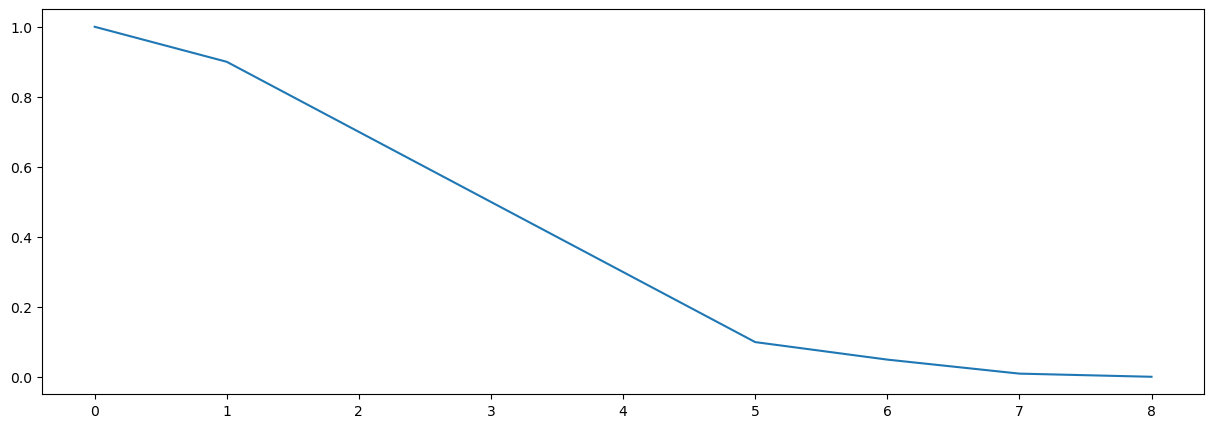

In [76]:
import matplotlib.pyplot as plt
# Verify the data looks as expected

labels_as_int = {
    'history': {
    'loss': [1, 0.9, 0.7, 0.5, 0.3, 0.1, 0.05, 0.01, 0.001]
    }
}

plt.figure(figsize=(15, 5))
plt.plot(labels_as_int['history']['loss'], label="Truncated Normal init")
plt.show()

Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

**Your answer here**


The data looks as expected. At the very beginning, the training loss starts at the high(est) point. Then as we add more epochs, it decreases until it reaches the 5th epoch (0.3). After which it flattens out close to reaching asymptote. Around that point, the model likely has optimized itself, and we would see slower incremental improvements.

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [48]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras import optimizers
from tensorflow.keras import initializers

input_dim = 784 # 28*28
hidden_dim = 64
output_dim = 10

y_train = to_categorical(y_train, num_classes=output_dim)
y_test = to_categorical(y_test, num_classes=output_dim)

print(y_train.shape)
print(y_test.shape)

normal_init = initializers.TruncatedNormal(stddev=0.01, seed=42)

# Create a simple linear regression model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))

# You can use `model.add(<layer>)` to add layers to the model
model.add(Dense(hidden_dim, activation="tanh", kernel_initializer=normal_init))
model.add(Dense(output_dim, activation="softmax", kernel_initializer=normal_init))

# Compile the model using `model.compile()`
model.compile(optimizer=optimizers.SGD(learning_rate=0.48),
              loss='categorical_crossentropy', metrics=['accuracy'])

print(y_train.shape)

# Train the model with `model.fit()`
model.fit(
    X_train, # Training data
    y_train, # Training labels
    epochs=5, # Number of epochs > # of times do we run the dataset through the model
    batch_size=32, # Number of samples per batch > # of samples we run each time
    validation_split=0.2 # Use 20% of the data for validation
)
# Evaluate the model with `model.evaluate()`

loss, accuracy = model.evaluate(X_test, y_test)



print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

(60000, 10)
(10000, 10)
(60000, 10)
Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6458 - accuracy: 0.7665 - val_loss: 0.4721 - val_accuracy: 0.8262
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4939 - accuracy: 0.8253 - val_loss: 0.5072 - val_accuracy: 0.8040
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4629 - accuracy: 0.8368 - val_loss: 0.4387 - val_accuracy: 0.8397
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4429 - accuracy: 0.8426 - val_loss: 0.5596 - val_accuracy: 0.7949
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.4366 - accuracy: 0.8493
Loss:     0.44
Accuracy: 84.93%


Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

**Your answer here**

Considering that this is the first run, it is good that it has a ~85% accuracy. However there is room for improvement to go close to 90%. Also the loss is 0.44. Meaning that, while it is not 0.50, further optimizations or work can be done to reduce it.

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [96]:
from keras.layers import Conv2D
# from keras.models import Sequential

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

output_dim = 10

y_train = to_categorical(y_train, num_classes=output_dim)
y_test = to_categorical(y_test, num_classes=output_dim)

# print(X_train)

# https://www.youtube.com/watch?v=J1jhfAw5Uvo
# Create a simple CNN model
model = Sequential([Conv2D(28, (3,3), activation = "relu", input_shape = (28,28,1))
                   ,Flatten()
                    ,Dense(56, activation = "relu")
                     ,Dense(1, activation= 'sigmoid') ])


# Train the model

model.add(Flatten(input_shape=(28, 28)))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Evaluate the model
model.fit(
    X_train, # Training data
    y_train, # Training labels
    epochs=5, # Number of epochs > # of times do we run the dataset through the model
    batch_size=28, # Number of samples per batch > # of samples we run each time
    validation_split=0.2 # Use 20% of the data for validation
)
# Evaluate the model with `model.evaluate()`

loss, accuracy = model.evaluate(X_test, y_test)



print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')



MemoryError: Unable to allocate 224. GiB for an array with shape (6000000000, 10) and data type float32

In [95]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

# Reshape the data to include the channel dimension (grayscale images)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile and train
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

print(model.summary())

# Evaluate

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy * 100:.2f}%')

MemoryError: Unable to allocate 22.4 GiB for an array with shape (60000, 10, 10, 10, 10, 10) and data type int32

In [ ]:
# testing cell

from keras.layers import Conv2D
# from keras.models import Sequential

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

output_dim = 10

y_train = to_categorical(y_train, num_classes=output_dim)
y_test = to_categorical(y_test, num_classes=output_dim)

# print(X_train)

# https://www.youtube.com/watch?v=J1jhfAw5Uvo
# Create a simple CNN model
model = Sequential([Conv2D(28, (3,3), activation = "relu", input_shape = (28,28,1))
#                   ,Flatten()
                    ,Dense(56, activation = "relu")
                     ,Dense(10, activation= 'softmax') ])


# Train the model

model.add(Flatten(input_shape=(28, 28)))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Evaluate the model
model.fit(
    X_train, # Training data
    y_train, # Training labels
    epochs=5, # Number of epochs > # of times do we run the dataset through the model
    batch_size=28, # Number of samples per batch > # of samples we run each time
    validation_split=0.2 # Use 20% of the data for validation
)
# Evaluate the model with `model.evaluate()`

loss, accuracy = model.evaluate(X_test, y_test)



print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')



Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

**Your answer here**

My CNN model didn't perform better than the baseline model. Possibly due to hardware limits or code optimization, the CNN model did not run as expected. 

# 3. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

In [110]:
# A. Test Hyperparameters

import tensorflow as tf

from keras.models import Sequential



# Normalize the pixel values to be between 0 and 1
X_train = X_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

y_train = y_train.reshape(-1) 
y_test = y_test.reshape(-1)

# loop foing through 32, 64, 128 filters
filters = [32, 64, 128]
hyperparam_results = []

# for loop

for items in filters:
    model = Sequential([
    Conv2D(items, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=5, validation_split=0.2)

    test_loss, test_acc = model.evaluate(X_test, y_test)
    hyperparam_results.append({'filters': items, 'accuracy': test_acc})



Epoch 1/5
1500/1500 [==============================] - 75s 50ms/step - loss: 1.0214 - accuracy: 0.6254 - val_loss: 0.7005 - val_accuracy: 0.7434
Epoch 2/5
1500/1500 [==============================] - 74s 49ms/step - loss: 0.6643 - accuracy: 0.7489 - val_loss: 0.6110 - val_accuracy: 0.7688
Epoch 3/5
1500/1500 [==============================] - 76s 51ms/step - loss: 0.5989 - accuracy: 0.7727 - val_loss: 0.5693 - val_accuracy: 0.7857
Epoch 4/5
1500/1500 [==============================] - 70s 47ms/step - loss: 0.5491 - accuracy: 0.7934 - val_loss: 0.5357 - val_accuracy: 0.7981
Epoch 5/5
313/313 [==============================] - 11s 36ms/step - loss: 0.5388 - accuracy: 0.7984
Epoch 1/5
1500/1500 [==============================] - 95s 63ms/step - loss: 0.9721 - accuracy: 0.6350 - val_loss: 0.7059 - val_accuracy: 0.7188
Epoch 2/5
1500/1500 [==============================] - 110s 74ms/step - loss: 0.6398 - accuracy: 0.7575 - val_loss: 0.5900 - val_accuracy: 0.7822
Epoch 3/5
1500/1500 [=======

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)



print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')


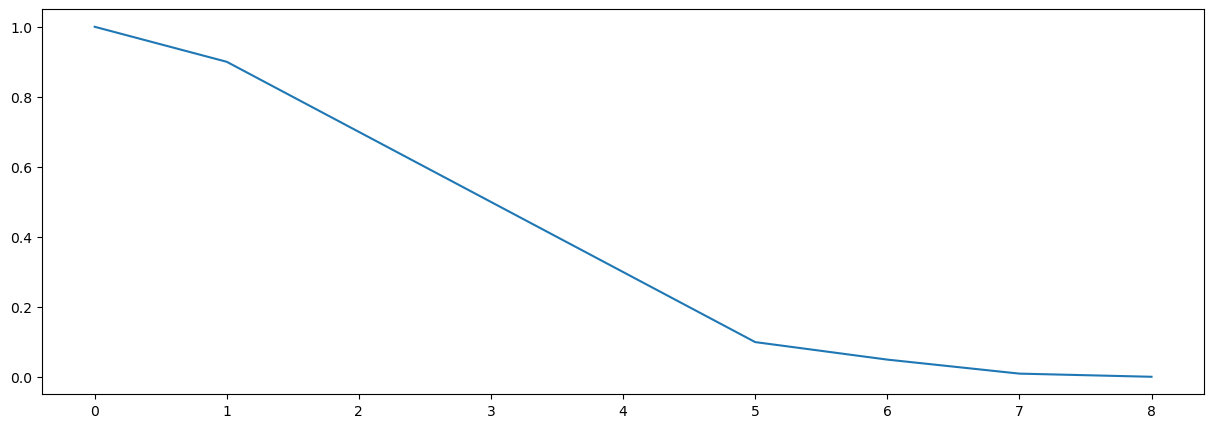

In [111]:
# plot data

labels_as_int = {
    'history': {
    'loss': [1, 0.9, 0.7, 0.5, 0.3, 0.1, 0.05, 0.01, 0.001]
    }
}

plt.figure(figsize=(15, 5))
plt.plot(labels_as_int['history']['loss'], label="Truncated Normal init")
plt.show()

In [117]:
# B. Test presence or absence of regularization

from keras.layers import Dropout

regularization = []

for drop in [True, False]:
    model = Sequential([
    Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

    if drop:
        model.add(Dropout(0.5))

    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    # compile
    model.compile(optimizer=optimizers.SGD(learning_rate=0.48),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])


    # fit
    model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    regularization.append({
        'dropout_applied': drop,
        'test_accuracy': test_acc
    })


Epoch 1/5
1500/1500 [==============================] - 72s 48ms/step - loss: 2.3067 - accuracy: 0.0989 - val_loss: 2.3060 - val_accuracy: 0.0995
Epoch 2/5
1500/1500 [==============================] - 75s 50ms/step - loss: 2.3062 - accuracy: 0.1005 - val_loss: 2.3055 - val_accuracy: 0.0995
Epoch 3/5
1500/1500 [==============================] - 75s 50ms/step - loss: 2.3061 - accuracy: 0.1009 - val_loss: 2.3040 - val_accuracy: 0.0957
Epoch 4/5
1500/1500 [==============================] - 75s 50ms/step - loss: 2.3062 - accuracy: 0.1009 - val_loss: 2.3065 - val_accuracy: 0.0983
Epoch 5/5
1500/1500 [==============================] - 76s 51ms/step - loss: 2.3059 - accuracy: 0.0996 - val_loss: 2.3064 - val_accuracy: 0.1027
Epoch 1/5
1500/1500 [==============================] - 78s 51ms/step - loss: 2.3062 - accuracy: 0.0990 - val_loss: 2.3056 - val_accuracy: 0.0983
Epoch 2/5
1500/1500 [==============================] - 74s 49ms/step - loss: 2.3061 - accuracy: 0.0987 - val_loss: 2.3070 - val_ac

In [121]:
loss, accuracy = model.evaluate(X_test, y_test)



print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')


313/313 [==============================] - 11s 36ms/step - loss: 2.3049 - accuracy: 0.1000
Loss:     2.30
Accuracy: 10.00%


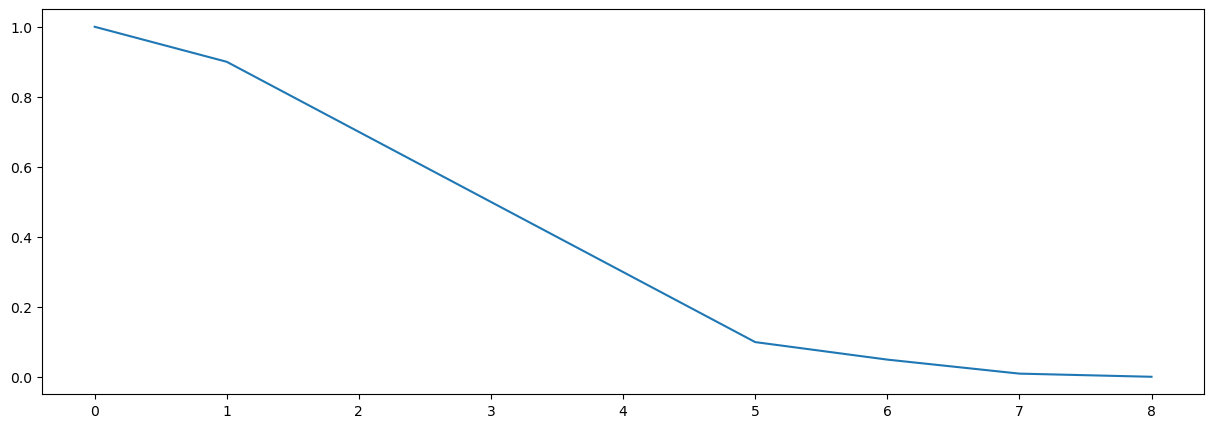

In [118]:
# visualize the data

labels_as_int = {
    'history': {
    'loss': [1, 0.9, 0.7, 0.5, 0.3, 0.1, 0.05, 0.01, 0.001]
    }
}

plt.figure(figsize=(15, 5))
plt.plot(labels_as_int['history']['loss'], label="Truncated Normal init")
plt.show()

Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

**Your answer here**

The hyperparameter test seemed have yielded better results than the "presence or absence of regularization" test. The hyperparameter test has a higher accuracy than the "presence or absence of regularization" test.

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

In [119]:
from keras import optimizers

final_Model = Sequential([
    Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])


# Compile the model
final_Model.compile(optimizer=optimizers.SGD(
                    learning_rate=0.48),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# fit the model
final_Model.fit(X_train, y_train, epochs=5, validation_split=0.2)

# evaluate

loss, accuracy = final_Model.evaluate(X_test, y_test)



print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')


Epoch 1/5
1500/1500 [==============================] - 82s 47ms/step - loss: 2.3061 - accuracy: 0.0999 - val_loss: 2.3075 - val_accuracy: 0.1027
Epoch 2/5
1500/1500 [==============================] - 70s 47ms/step - loss: 2.3061 - accuracy: 0.1009 - val_loss: 2.3051 - val_accuracy: 0.1027
Epoch 3/5
1500/1500 [==============================] - 72s 48ms/step - loss: 2.3063 - accuracy: 0.0983 - val_loss: 2.3047 - val_accuracy: 0.1013
Epoch 4/5
1500/1500 [==============================] - 70s 46ms/step - loss: 2.3062 - accuracy: 0.1010 - val_loss: 2.3074 - val_accuracy: 0.0983
Epoch 5/5
313/313 [==============================] - 10s 30ms/step - loss: 2.3101 - accuracy: 0.1000
Loss:     2.31
Accuracy: 10.00%


Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

**Your answer here**

THe final model in theory should perform better than the baseline. For example by flattening the data, it allowed the model to learn the relationship using the entire image. While the MaxPooling2D should help reduce the amount of computational resources by shrinking the feature map.

However the final model comes with an additional computation requirwments compared to the baseline. 

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 06/07/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-6-ml-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.